In [ ]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [3]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

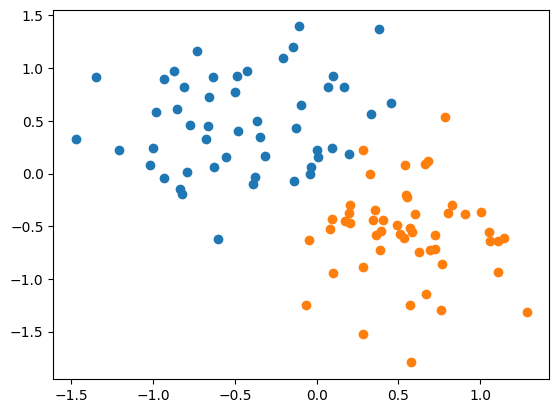

In [5]:
scatter_plot()

In [6]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

In [7]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [8]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [9]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

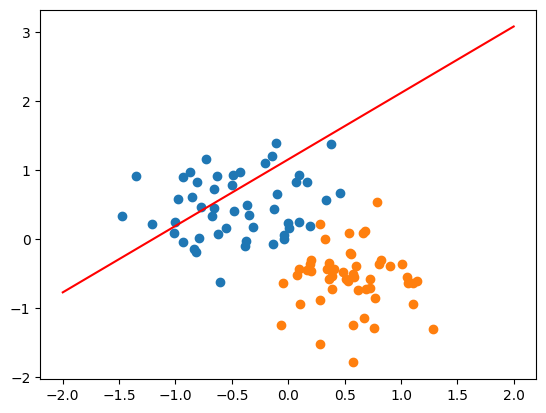

In [10]:
plot_fit('Initial Model')

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'epoch')

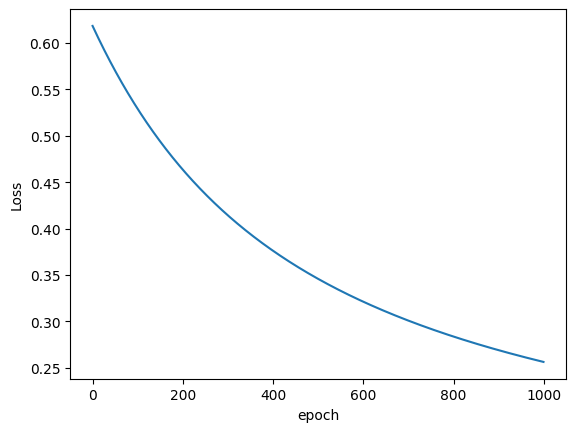

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

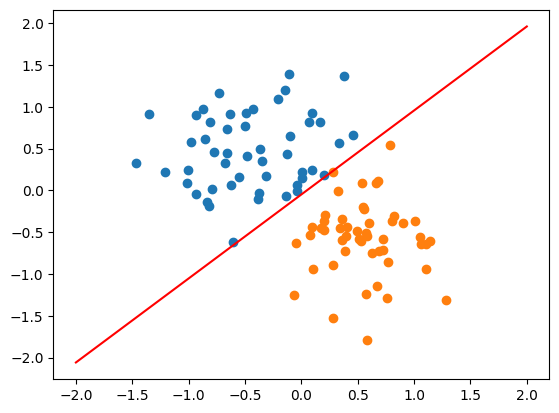

In [14]:
plot_fit('Trained Model')